1. Các phép toán trên vector và ma trận

In [50]:
# Tính độ dài vector

import numpy as np

def compute_vector_length(vector):    
    len_of_vector = np.linalg.norm(vector)
    return len_of_vector

vector = np.array([-2, 4, 9, 21])
print(compute_vector_length(vector))

23.280893453645632


In [51]:
# Tich vo huong

import numpy as np

def compute_dot_product(vector1, vector2):    
    dot_product = np.dot(vector1, vector2)
    return dot_product

vector1 = np.array([0, 1, -1, 2])
vector2 = np.array([2, 5, 1, 0])
print(compute_dot_product(vector1, vector2))

4


In [55]:
# Nhan ma tran voi vector

import numpy as np

def matrix_multip_vector(matrix, vector):    
    result = np.dot(matrix, vector)
    return result

matrix = np.array([[-1, 1, 1], 
                   [0, -4, 9]])
vector = np.array([0, 2, 1])
print(matrix_multip_vector(matrix, vector))

[3 1]


In [58]:
# Nhan ma tran voi ma tran

import numpy as np

def matrix_multip_matrix(matrix1, matrix2):    
    result = np.dot(matrix1, matrix2)
    return result

matrix1 = np.array([[0, 1, 2], 
                   [2, -3, 1]])
matrix2 = np.array([[1, -3], 
                   [6, 1], 
                   [0, -1]])
print(matrix_multip_matrix(matrix1, matrix2))

[[  6  -1]
 [-16 -10]]


In [64]:
x = np.array([1, 2, 3, 4])
y = np.array([1, 0, 3, 0])
result = compute_cosine(x,y)
print(round(result, 3))

0.577


In [9]:
# Ma tran nghich dao

import numpy as np

def inverse_matrix(matrix):
    result = np.linalg.inv(matrix)
    return result

matrix1 = np.array([[9, 10, 0], 
                   [1, -1, 2], 
                   [0.5, 7, 12]])

print(inverse_matrix(matrix))

[[ 0.0755814   0.34883721 -0.05813953]
 [ 0.03197674 -0.31395349  0.05232558]
 [-0.02180233  0.16860465  0.05523256]]


2. Eigenvector và eigenvalues

In [13]:
import numpy as np

def compute_eigenvalues_eigenvectors(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    return eigenvalues,  eigenvectors

matrix = np.array([[9, 10, 0], 
                   [1, -1, 2], 
                   [0.5, 7, 12]])

for _ in compute_eigenvalues_eigenvectors(matrix):
    print(_)

[-2.74336637  9.39133171 13.35203466]
[[ 0.61391584 -0.95802463  0.35202374]
 [-0.72094386 -0.03749054  0.15320195]
 [ 0.32147672  0.28422399  0.92336799]]


3. Cosine Similarity

In [15]:
import numpy as np

def compute_cosine(v1, v2):
    compute_dot_product = np.dot(v1, v2)
    length_v1 = np.linalg.norm(v1)
    length_v2 = np.linalg.norm(v2)
    return compute_dot_product / (length_v1*length_v2) 

v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])

print(compute_cosine(v1, v2))


0.9746318461970762


4. Backgroundsubtraction( tách nền )

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

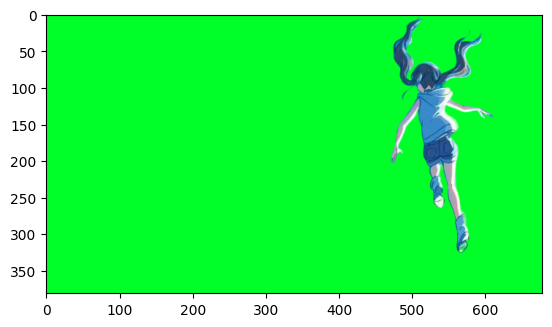

In [42]:
obj_image = cv2.imread("Object.png", 1)
obj_image = cv2.resize(obj_image, (678, 381))
plt.imshow(obj_image[:, :, ::-1])

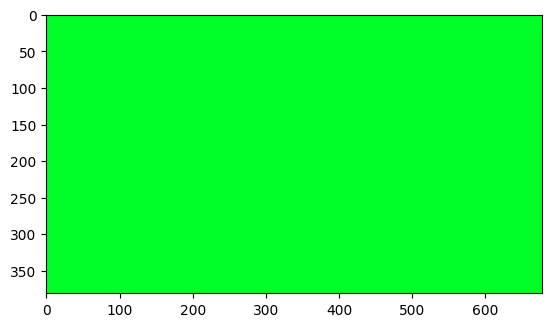

In [43]:
bg_image = cv2.imread("GreenBackground.png", 1)
bg_image = cv2.resize(bg_image, (678, 381))
plt.imshow(bg_image[:, :, ::-1])

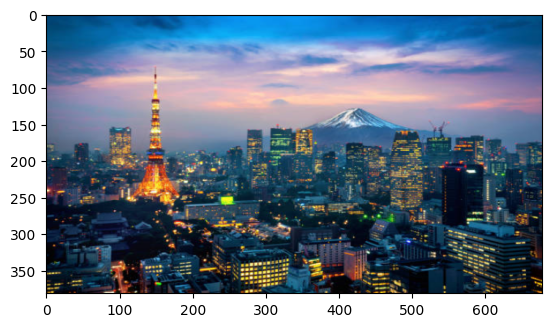

In [44]:
new_bg_image = cv2.imread("NewBackground.jpg", 1) 
new_bg_image = cv2.resize(new_bg_image, (678, 381))
plt.imshow(new_bg_image[:, :, ::-1])

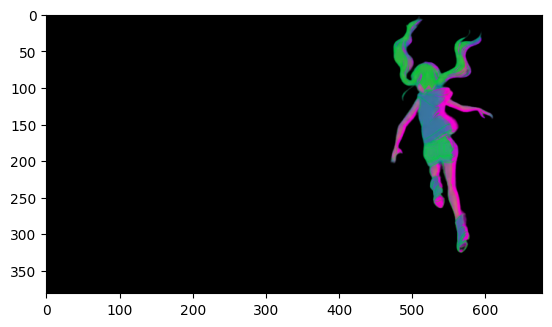

In [45]:
def compute_difference(bg_image, obj_image):
    different = cv2.absdiff(bg_image, obj_image)
    return different

plt.imshow(compute_difference(bg_image, obj_image)[:, :, ::-1])


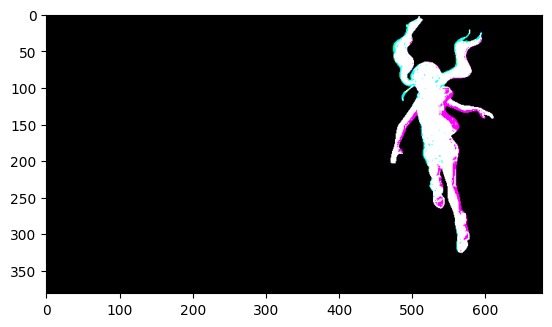

In [48]:
def compute_binary_mask(difference_single_channel):
    _, binary_mask = cv2.threshold(difference_single_channel, 10, 255, cv2.THRESH_BINARY)
    return binary_mask

binary_mask = compute_difference(bg_image, obj_image)
plt.imshow(compute_binary_mask(binary_mask)[:, :, ::-1])

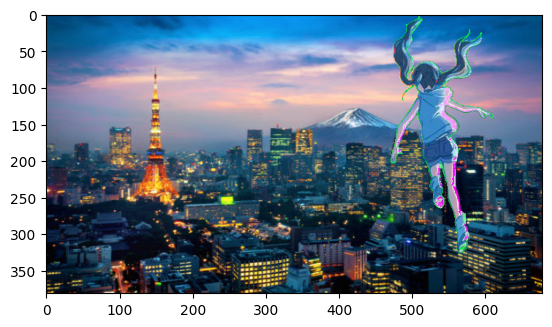

In [49]:
def replace_background(difference_binary, obj_image, new_bg_image):
    output = np.where(difference_binary==0, new_bg_image, obj_image)
    return output

difference_binary = compute_binary_mask(binary_mask)
replace_bg = replace_background(difference_binary, obj_image, new_bg_image)
plt.imshow(replace_bg[:, :, ::-1])